In [1]:
# Load data
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
vol = imageio.volread('D:\MON HOC\TT XLA\data\SDC4201','DICOM')
im = vol[20,:,:]
# Smooth intensity values
im_filt=ndi.median_filter(im,size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt>400, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

# Find image center of mass
com = ndi.center_of_mass(labels, labels, index=7) #label cua tim là label = 7
plt.imshow(im)
plt.title("anh goc")
plt.show()
def format_and_render_plot():
    fig = plt.gcf()
    fig.axes[0].axis('off')
    plt.tight_layout()
    plt.show()

Reading DICOM (examining files): 1/31 files (3.2%31/31 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 30/30  (100.0%)
Num. Labels: 19


<Figure size 640x480 with 1 Axes>

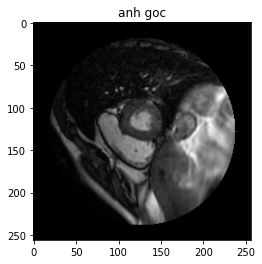

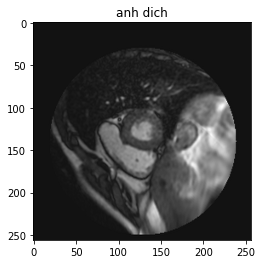

In [2]:
# Excercise 1: Translation - Dịch ảnh
com = ndi.center_of_mass(labels, labels, index=7) #label cua tim là label = 7
d0 = 128 - com[0]
d1 = 128 - com[1]
im_trs = ndi.shift(im, shift=[d0, d1])
plt.figure(1)
plt.imshow(im,cmap='gray')
plt.title("anh goc")
plt.figure(2)
plt.imshow(im_trs,cmap='gray')
plt.title("anh dich")
plt.show()

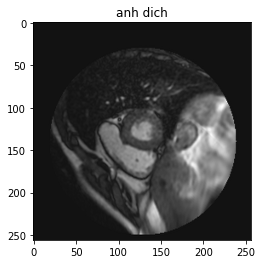

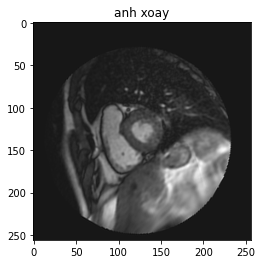

In [3]:
# Excercise 2: Rotations - Xoay ảnh
im_ro = ndi.rotate(im_trs, angle=-30, reshape=False)
plt.figure(1)
plt.imshow(im_trs,cmap='gray')
plt.title("anh dich")
plt.figure(2)
plt.imshow(im_ro ,cmap='gray')
plt.title("anh xoay")
plt.show()

In [4]:
# Excercise 3: Affine transform - Biến đổi ảnh

mat1 = np.array([[0.8, -0.4, 90],
                 	[0.4, 0.8, -6.0],
                 	[0, 0, 1]])
mat2 = np.array([[1, 0, 0],
                 	[0, 1, 0],
                 	[0, 0, 1]])
mat3 = np.array([[1, -0.3, 60],
                 	[-0.3, 1, 60],
                 	[0, 0, 1]])
mat4 = np.array([[1.5, -0.8, 60],
                 	[0.8, 1.5, -140],
                 	[0, 0, 1]])
im_at1 = ndi.affine_transform(im, mat1)
im_at2 = ndi.affine_transform(im, mat2)
im_at3 = ndi.affine_transform(im, mat3)
im_at4 = ndi.affine_transform(im, mat4)


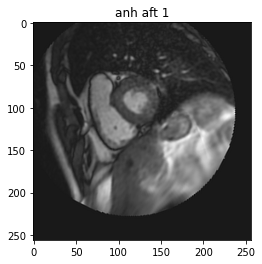

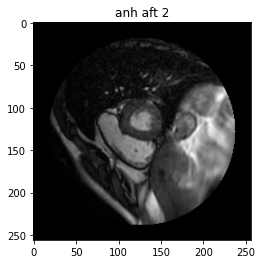

In [5]:
# cach 2 thay the và chạy bằng vòng lặp for
img_aft= [ndi.affine_transform(im, mat) for mat in [mat1,mat2,mat3,mat4]]
plt.figure(1)
plt.imshow(img_aft[0],cmap='gray')
plt.title("anh aft 1")
plt.figure(2)
plt.imshow(img_aft[1], cmap='gray')
plt.title("anh aft 2")
plt.imshow(img_aft[1], cmap='gray')
plt.title("anh aft 2")
plt.show()


(256, 256)


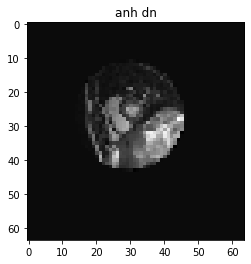

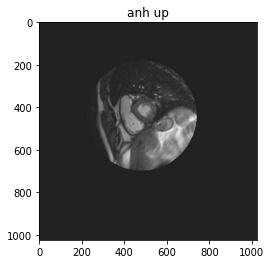

In [6]:
# Excercise 4: Resampling - Lấy mẫu lại
# Xai anh aft2
x=3
print(img_aft[x].shape)
im_dn = ndi.zoom(img_aft[x], zoom=0.25)
im_up = ndi.zoom(img_aft[x], zoom=4.00)
plt.figure(1)
plt.imshow(im_dn,cmap='gray')
plt.title("anh dn")
plt.figure(2)
plt.imshow(im_up, cmap='gray')
plt.title("anh up")
plt.show()
print()

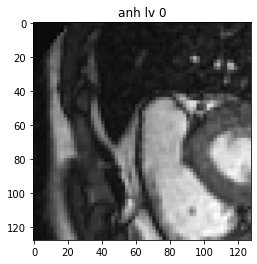

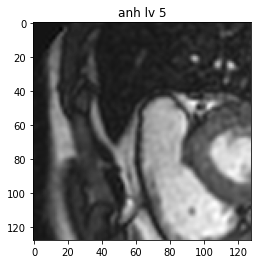

In [7]:
# Excercise 5: Interpolation - Nội suy hình ảnh
up0 = ndi.zoom(img_aft[x], zoom=512/256, order=0)
up5 = ndi.zoom(img_aft[x], zoom=512/256, order=5)
plt.figure(1)
plt.imshow(up0[128:256,128:256],cmap='gray')
plt.title("anh lv 0")
plt.figure(2)
plt.imshow(up5[128:256,128:256], cmap='gray')
plt.title("anh lv 5")
plt.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
MAE: 0.1914520263671875


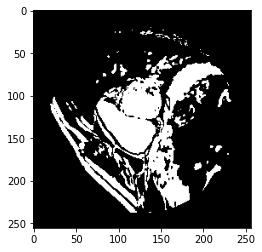

In [10]:
# Excercise 6: Calculate volume - Tinh luu luong 
# Convert binary

def convert_bin(q):
    mask=q>150
    #k=np.where(mask,1,0)
    return mask
im1 = vol[0,:,:]
im_bin1= convert_bin(im1)
im2 = vol[29,:,:]
im_bin2= convert_bin(im2)
print(im_bin1)
print(im_bin2)

mean_abs_err = np.mean(np.abs(im_bin1.astype('int') - im_bin2.astype('int')))
print('MAE:', mean_abs_err)
# Calculate absolute image difference
abs_err = np.abs(im_bin1.astype('int') - im_bin2.astype('int'))
plt.imshow(abs_err, cmap='gray', vmin=0, vmax=1)
plt.show()

In [11]:
#Exercise 7: Intersection of the union - Tinh so diem anh giao nhau cua 2 anh
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()
print('Intersection of the union is:',intersection_of_union(im_bin1, im_bin2))

Intersection of the union is: 0.4375056038733973


In [12]:
#Exercise 8: Identifying potential confounds
file = pd.read_csv('D:\\MON HOC\\TT XLA\\Biomedical-Image-Analysis-in-Python-master\\Alzhiemer\\oasis_all_volumes.csv')
# Print a correlation table
df=DataFrame(file)
print(df.corrwith(df,drop=True,method='pearson'))

age                 1.0
alzheimers          1.0
brain_vol           1.0
skull_vol           1.0
gray_matter_vol     1.0
white_matter_vol    1.0
csf_vol             1.0
dtype: float64


t =  -10.27076306169677
p =  3.043550344658516e-22


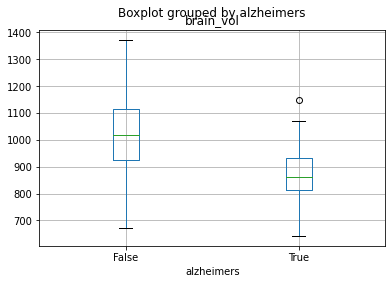

In [13]:
#Exercise 9: Testing Group Differences
from scipy.stats import ttest_ind

# Select data from "alzheimers" and "typical" groups
brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

# Perform t-test of "alz" > "typ"
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

# Show boxplot of brain_vol differences
df.boxplot(column='brain_vol', by='alzheimers')
plt.show()

In [14]:
from scipy import ndimage
a = ([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])
ndimage.binary_closing(a).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

Reading DICOM (examining files): 1/31 files (3.2%31/31 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 30/30  (100.0%)


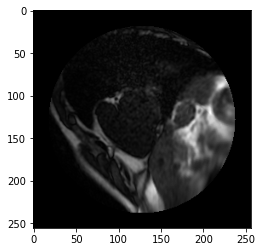

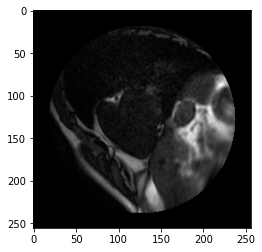

In [15]:
# Load data
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
vol = imageio.volread('D:\MON HOC\TT XLA\data\SDC4201','DICOM')

for mat in range(2):
    plt.imshow(vol[mat,:,:],cmap='gray') 
    plt.show()